In [1]:
%cd ../..

/home/armand/PhD/FFF_fiberlearning


In [24]:
from fff import FreeFormInjectiveFlow, FreeFormInjectiveFlowHParams
from fff.model import ResNet

config = { 
    "latent_distribution": {
      "name": "normal",
    },
    "data_set": {
      "name": "precompiled_dataset",
      "root": "datasets/SubjectModel_ResNet_2moons/",
    },
    
    "noise": 0.,
    
    "loss_weights": {
      "nll": 1,
      "noisy_reconstruction": 100,
    },


    "train_models": True,
    "models": [{"name": "fff.model.ResNet",
        "latent_dim": 1,
        "layers_spec": [[256, 256], [256, 256], [256, 256], [256, 256]]}],    
    
    "lr_scheduler": "onecyclelr",
    
    "batch_size": 128,
    "optimizer": {
      "name": "adam",
      "lr": 0.001,
      "weight_decay": 0.00002
    },
    
    "max_epochs": 1000,
    
    "num_workers": 4,
    "gradient_clip": 3.0,
    "accelerator": "gpu",
}


In [25]:
FiberModelHParams = FreeFormInjectiveFlowHParams(**config)
FiberModel = FreeFormInjectiveFlow(hparams=FiberModelHParams)

cond_dim:  1
latent_dim:  1


In [ ]:
FiberModel.fit(
    logger_kwargs={"save_dir": "notebooks/FiberModels/saved_models", "name": "FiberModel_ResNet_2moons"},
)

INFO: GPU available: True (cuda), used: True
INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO: IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO: HPU available: False, using: 0 HPUs
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name   | Type       | Params
--------------------------------------
0 | models | Sequential | 540 K 
--------------------------------------
540 K     Trainable params
0         Non-trainable params
540 K     Total params
2.163     Total estimate

Sanity Checking: 0it [00:00, ?it/s]

/home/armand/PhD/FFF_fiberlearning/fff/base.py:672: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = torch.mean(torch.abs(torch.std(z_details, dim=0) - 1))


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [21]:
import os

SubjectModel = FreeFormInjectiveFlow.load_from_checkpoint(
    "notebooks/SubjectModels/saved_models/SubjectModel_ResNet_2moons/checkpoints/last.ckpt"
    )

versions = os.listdir("notebooks/FiberModels/saved_models/FiberModel_ResNet_2moons/")
last_version = max([int(v.split("_")[-1]) for v in versions])

FiberModel = FreeFormInjectiveFlow.load_from_checkpoint(
    f"notebooks/FiberModels/saved_models/FiberModel_ResNet_2moons/version_{last_version}/checkpoints/last.ckpt"
    )

2moons
cond_dim:  0
latent_dim:  1
cond_dim:  1
latent_dim:  1


In [22]:
from fff.evaluate.plots import all_conditions
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib
import math
from fff.evaluate.plots import ensure_list, build_mesh
matplotlib.rcParams.update({'font.size': 20})


def calc_PGD(x, c0, SubjectModel, FiberModel, n_steps):
    torch.set_grad_enabled(True)
    c0 = torch.unsqueeze(c0,dim=0)
    x = x.to(SubjectModel.device)
    
    def closs(c0, c_hat, x_hat):
        v = torch.sum(torch.sqrt(torch.abs(torch.sum(((c0 - c_hat)**2), dim=-1))))
        #distance = torch.sqrt(torch.sum(((x_hat.detach().cpu() - vx[0])**2), dim=-1))
        #r = torch.max(torch.Tensor([0., (distance - constraint).item()]))
        #print("loss:", v.item())
        #if r != 0:
        #    print("penalty:", r.item())
        return v
    
    class XModel(torch.nn.Module):
        def __init__(self):
            super().__init__()
            self.param = torch.nn.Parameter(x.clone())
    
    xmodel = XModel()
    optimizer = torch.optim.Adam(xmodel.parameters(), lr=0.005)
    max_x = torch.max(torch.abs(xmodel.param))
    
    c_empty = torch.empty((0,), device=FiberModel.device, dtype=x.dtype)
    for i in range(n_steps):
        conditioned = SubjectModel.apply_conditions((xmodel.param.to(SubjectModel.device),))
        c_GT = conditioned.condition
        x_GT = conditioned.x0
        xc = (SubjectModel.encode(x_GT, c_GT).cpu() - FiberModel.data_shift) / FiberModel.data_scale
        loss = closs(c0, xc, x)
        """
        if loss < 1:
            for g in optimizer.param_groups:
                g['lr'] = 0.001
        """
        loss.backward()
        optimizer.step()
        # check, if image gets further apart than 
        #check = torch.mean(torch.sqrt(torch.sum(((x0 - zx.cpu())**2), dim=-1)))
        #if check > constraint:
        #    print("too far:")
        #    print(check.item())
        optimizer.zero_grad()
        if (loss<0.01 or math.isnan(loss)):
            break

    
    
    torch.set_grad_enabled(False)
    max_x_after = torch.max(torch.abs(xmodel.param))
    if max_x_after > 5. and (max_x_after-max_x) > 1.:
        print("warning!, z got an extreme value:", max_x_after)
    #zx = model.decode(xmodel.param.to(model.device), c_empty).detach().cpu()
    x = xmodel.param.detach().cpu()
    print(loss.item())
    return x, loss


@torch.no_grad()
def plot_grid(ax, mapping, pos_min, pos_max, resolution=25,
              sub_resolution=0, color="black", linewidth=0.75, linestyle="-",
              pos_in_filter=None, device=None, dtype=None, **kwargs):
    for row_mode, this_resolution in zip([True, False],
                                         ensure_list(resolution, 2)):
        lines_resolution = [this_resolution,
                            this_resolution * (sub_resolution + 1)][::-1 if row_mode else 1]
        x, y, pos = build_mesh(pos_min, pos_max, lines_resolution,
                               device=device, dtype=dtype)
        if pos_in_filter is not None:
            pos[~pos_in_filter(pos)] = float("nan")
        pos_out = mapping(pos).cpu()
        pos_new = pos_out.reshape((*x.shape, -1)).numpy()
        if row_mode:
            segs = pos_new.transpose(1, 0, 2)
        else:
            segs = pos_new
        ax.plot(segs[:, :, 0], segs[:, :, 1], ls=linestyle, color=color,
                 lw=linewidth, **kwargs)

@torch.no_grad()
def plot_samples_grid(ax, SubjectModel, FiberModel, resolution=30):
    extent = [-2, 2]
    def reconstruction(x):
        x = x.to(SubjectModel.device)
        c_GT = SubjectModel.apply_conditions((x,)).condition
        c = (SubjectModel.encode(x, c_GT) - FiberModel.data_shift) / FiberModel.data_scale
        return FiberModel(x,c)
    
    def distance_filter(pos):
        dist = torch.min(((pos.unsqueeze(0) - FiberModel.val_data[:][0].unsqueeze(1))**2).sum(dim=2), dim=0)[0]
        return dist < 0.03
    
    plot_grid(ax, lambda x: x, *extent, color="0.7", resolution=resolution, pos_in_filter=distance_filter)
    plot_grid(ax, reconstruction, *extent, sub_resolution=50, resolution=resolution, pos_in_filter=distance_filter)
    

@torch.no_grad()
def plot_GT(SubjectModel, FiberModel, data_type='train', gd_steps=50, N_fibers=21, model_name="FiberModel"):
    device = SubjectModel.device
    fig, ax = plt.subplots(figsize=[15,14])
    data = {}

    if data_type=='train':
        data = SubjectModel.train_data[:]
    elif data_type=='val':
        data = SubjectModel.val_data[:]
    elif data_type=='test':
        data = SubjectModel.test_data[:]

    conditioned = SubjectModel.apply_conditions(data)
    samples = conditioned.x_noisy
    c_GT = conditioned.condition
    
    #plot samples
    plt_samples = samples.T.numpy()
    #col_sam = "green" if model.transform == "diffusion" else "limegreen"
    ax.scatter(*plt_samples, s=2, label=r"Data", c="limegreen" ,alpha=1)

    
    print("processing data...")
    batch_size = SubjectModel.hparams.batch_size
    z_GT = torch.cat([
        SubjectModel.encode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(samples.split(batch_size), c_GT.split(batch_size))
    ])
    #GT-model decodes data
    x1 = torch.cat([
        SubjectModel.decode(batch.to(device), c_batch.to(device)).cpu()
        for batch, c_batch in zip(z_GT.split(batch_size), c_GT.split(batch_size))
    ])   
    
    #reconstruct data with model
    FiberModel.to(device)
    c_m = (z_GT - FiberModel.data_shift) / FiberModel.data_scale
    print(FiberModel.transform)
    if FiberModel.transform != "diffusion":
        z_m = torch.cat([
            FiberModel.encode(batch.to(device), c_batch.to(device)).cpu()
            for batch, c_batch in zip(samples.split(batch_size), c_m.split(batch_size))
        ])
        if FiberModel.transform=="inn":
            z_list = []
            for batch, c_batch in zip(z_m.split(batch_size), c_m.split(batch_size)):
                _z_dense = FiberModel.transform_model.encode(batch.to(device), c_batch.to(device))
                while True:    
                    if isinstance(_z_dense, tuple):
                        _z_dense = _z_dense[0]
                    else: break
                z_list.append(_z_dense.detach().cpu())
            z_dense_m = torch.cat(z_list)
        elif FiberModel.transform:
            z_dense_m = torch.cat([
                FiberModel.transform_model.encode(batch.to(device), c_batch.to(device)).cpu()
                for batch, c_batch in zip(z_m.split(batch_size), c_m.split(batch_size))
            ])
        else:
            z_dense_m = z_m
    if FiberModel.transform not in ["diffusion", "inn"]:
        if FiberModel.transform:
            z1_m = torch.cat([
                FiberModel.transform_model.decode(batch.to(device), c_batch.to(device)).cpu()
                for batch, c_batch in zip(z_dense_m.split(batch_size), c_m.split(batch_size))
            ])
        else:
            z1_m = z_m
        x_m1 = torch.cat([
            FiberModel.decode(batch.to(device), c_batch.to(device)).cpu()
            for batch, c_batch in zip(z1_m.split(batch_size), c_m.split(batch_size))
        ])
    else:
         x_m1 = FiberModel.sample(torch.Size([x1.shape[0]]), c_m.to(device)).cpu()
                
    
    recon = x_m1.cpu().T.numpy()
    #plot reconstruction
    label_rec = "Samples" if FiberModel.transform in ["diffusion","inn"] else "Reconstruction"
    ax.scatter(*recon, s=2, label=label_rec, c='b',alpha=1)
    """
    lines_x = np.array([samples[0,:],recon[0,:]])
    lines_y = np.array([samples[1,:],recon[1,:]])
    plt.plot(lines_x, lines_y, linewidth=0.4, color='red', alpha=1)
    """        
    #plot decoded data
    ax.scatter(*x1.T, s=2, label=r"Projection", c="violet")
    
    print("sampling fibers...")
    fiber_size = 1000
    step = np.concatenate((np.linspace(-2.8,-0.4,N_fibers//3),np.linspace(-0.3,0.3,N_fibers//3),np.linspace(0.4,2.8,N_fibers//3)))
    c = []
    fibers_true = []
    for i in range(N_fibers):
        c.append(((torch.ones([fiber_size,1]) * step[i]) - FiberModel.data_shift) / FiberModel.data_scale)
    c = torch.cat(c)
    fibers_learned = FiberModel.sample(torch.Size([N_fibers*fiber_size]), c.to(device)).cpu()
    #correct fibers
    for i in range(N_fibers):
        x_c, _ = calc_PGD(fibers_learned[i*fiber_size:(i+1)*fiber_size], c[i*fiber_size:(i+1)*fiber_size], SubjectModel, FiberModel, gd_steps)
        fibers_true.append(x_c)
    fibers_true = torch.cat(fibers_true)
    #plot both fibers
    ax.scatter(*fibers_learned.T, s=8, color = "orange", label="Learned Fiber")
    ax.scatter(*fibers_true.T, s=2, color = "red", label="Corrected Fiber",alpha=0.8)
    
    ax.axis('equal')
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)
    
    axins = zoomed_inset_axes(ax, 10, loc="lower left") # zoom = 6
    axins.spines['bottom'].set_color('magenta')
    axins.spines['bottom'].set_linewidth(2.)
    axins.spines['top'].set_color('magenta')
    axins.spines['top'].set_linewidth(2.)
    axins.spines['left'].set_color('magenta')
    axins.spines['left'].set_linewidth(2.)
    axins.spines['right'].set_color('magenta')
    axins.spines['right'].set_linewidth(2.)
    axins.scatter(*plt_samples, s=3, label=r"Data", c="limegreen" ,alpha=1)
    axins.scatter(*recon, s=3, label=label_rec, c='b',alpha=1)
    axins.scatter(*x1.T, s=3, label=r"Projection", c="violet")
    axins.scatter(*fibers_learned.T, s=3, color = "orange", label="Learned Fiber")
    axins.scatter(*fibers_true.T, s=3, color = "red", label="Corrected Fiber",alpha=0.8)
    
    # sub region of the original image
    x1, x2, y1, y2 = -1.6, -1.5, 0.7075, 0.8025
    #x1, x2, y1, y2 = -0.8, -0.4, 0.3, 0.8
    axins.set_xlim(x1, x2)
    axins.set_ylim(y1, y2)
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="magenta", linewidth=2)
    
    #plot grid reconstruction
    if not FiberModel.transform in ["diffusion", "inn"]:
        plot_samples_grid(ax, SubjectModel, FiberModel)
        plot_samples_grid(axins, SubjectModel, FiberModel)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    axins.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axins.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    
    ax.legend(markerscale=5., loc="upper right")
    ax.set_title(f"{model_name}")
    plt.show()
    plt.close()

    
    def normal(x):
        return np.exp(-x**2/2)/np.sqrt(2*np.pi)
    
    #plot latent distribution
    if not FiberModel.transform == "diffusion":
        n_dim = z_dense_m.shape[1]
        fig, axes = plt.subplots(1, n_dim, figsize=(12*n_dim, 6))
        a = np.linspace(-3,3,100)
        for i in range(n_dim):
            if n_dim>1:
                axis = axes[i]
            else:
                axis = axes
            axis.hist(z_dense_m[:4000,i].squeeze(), bins=60, density=True)
            axis.plot(a, normal(a), linewidth=4)
            axis.set_xlabel(f'Latent Dimension {i}')
            axis.set_ylabel('Density')
        fig.suptitle(f'{model_name} Latent Distribution')

processing data...
False
sampling fibers...
nan
2.9981696605682373
nan
nan
nan
nan
nan
nan
0.18579894304275513
nan
0.11959630250930786
0.19440782070159912
0.3289138674736023
0.48038625717163086
nan
nan
nan
nan
0.1724807620048523
nan
0.30167633295059204
nan
nan
nan
nan
nan
nan


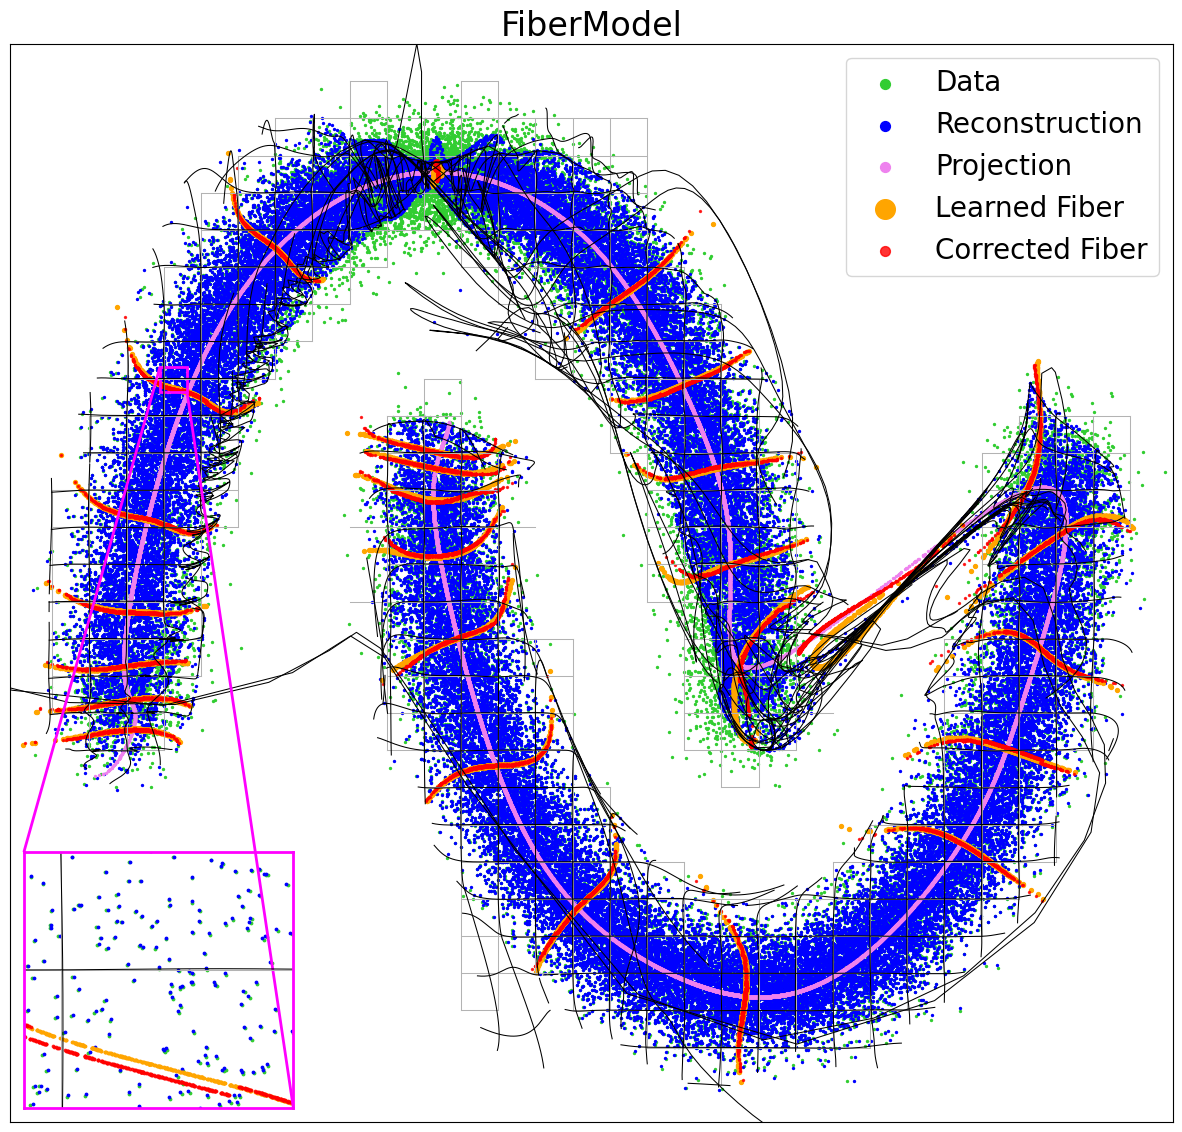

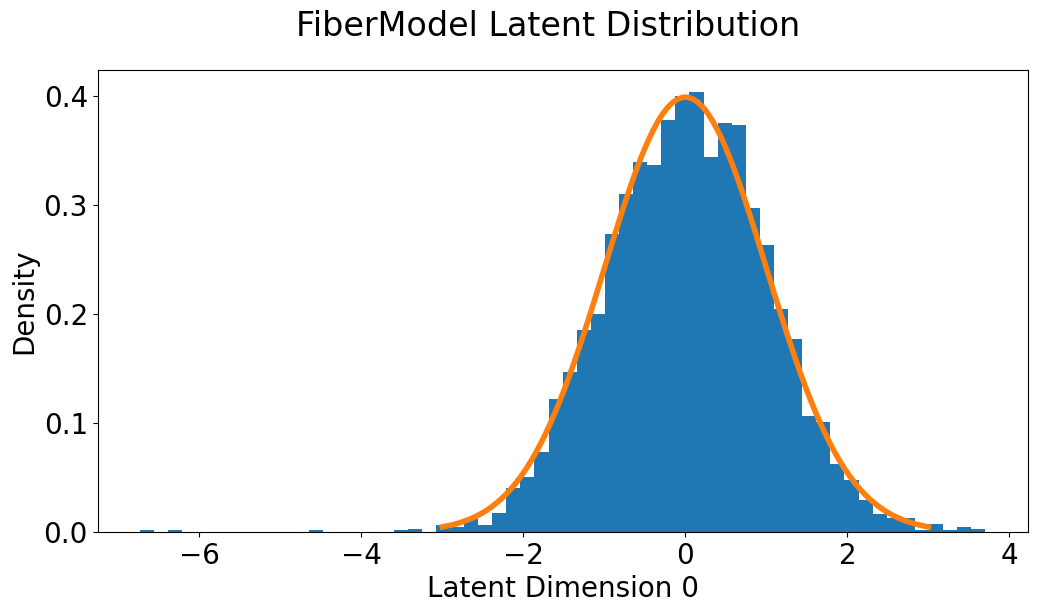

In [23]:
plot_GT(SubjectModel, FiberModel, data_type="train", gd_steps=100, N_fibers=27)